In [0]:
import imaplib
import os
import email
import matplotlib.pyplot as plt

EMAIL_DATASET_PATH = os.path.join(os.getcwd(), 'emails')
if not os.path.exists(EMAIL_DATASET_PATH):
    os.mkdir(EMAIL_DATASET_PATH)
mail = imaplib.IMAP4_SSL('imap.gmail.com')
# imaplib module implements connection based on IMAPv4 protocol
mail.login("asfinavayani1@gmail.com", "V@yani1995")
# >> ('OK', [username at gmail.com Vineet authenticated (Success)'])

('OK', [b'asfinavayani1@gmail.com authenticated (Success)'])

In [0]:
mail.list() # Lists all labels in GMail
mail.select('inbox') # Connected to inbox.

('OK', [b'918'])

In [0]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [0]:
result, data = mail.uid('search', None, "ALL")
# search and return uids instead
i = len(data[0].split()) # data[0] is a space separate string
for x in range(i):
    latest_email_uid = data[0].split()[x] # unique ids wrt label selected
    result, email_data = mail.uid('fetch', latest_email_uid, '(RFC822)')
    # fetch the email body (RFC822) for the given ID
    raw_email = email_data[0][1]

    #continue inside the same for loop as above
    raw_email_string = raw_email.decode('utf-8')

    # converts byte literal to string removing b''
    email_message = email.message_from_string(raw_email_string)
    subject = email_message['Subject']
    print(subject)

    # this will loop through all the available multiparts in mail
    for part in email_message.walk():
        if part.get_content_type() == "text/plain": # ignore attachments/html
            body = part.get_payload(decode=True)
            try:
              content = body.decode('utf-8')
              formatted = content.replace('\r', '').replace('\n', ' ')
              formatted = re.sub('[^ ]+\.[^ ]+','',formatted)
              formatted = formatted + " " + subject
              print(formatted)
              save_string = str("email_" + str(x) + ".eml")
              with open(os.path.join(EMAIL_DATASET_PATH, save_string), 'a') as file:
                  file.write(formatted)
                  print(str(x) + ' email is saved')
            except Exception as err:
              print(err)

        else:
         continue
    # break
        
    # if x == 9000:
    #     break

Three tips to get the most out of Gmail
 Three tips to get the most out of Gmail [image: Google]  Hi Asfina  Tips to get the most out of Gmail  [image: Contacts] Bring your contacts and mail into Gmail  On your computer, you can copy your contacts and emails from your old email account to make the transition to Gmail even better. Learn how  [image: Search] Find what you need fast  With the power of Google Search right in your inbox, it's easy to sort your email. Find what you're looking for with predictions based on email content, past searches and contacts. [image: Search] Much more than email  You can send text messages and make video calls with Hangouts  right from Gmail. To use this feature on mobile, download the Hangouts app for Android  and Apple  devices.   [image: Gmail icon]Happy emailing, The Gmail Team  © 2015 Google Inc. 1600 Amphitheatre Parkway, Mountain View, CA 94043  Three tips to get the most out of Gmail
0 email is saved
The best of Gmail, wherever you are
 The best

In [0]:
filedata = ''

for emailpath in os.listdir(EMAIL_DATASET_PATH):
    with open(os.path.join(EMAIL_DATASET_PATH, emailpath), 'r') as file:
        lines = file.readlines()
        for line in lines:
            filedata+=line
print('Processed!!')

Processed!!


In [0]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Generate wordcloud data
wordcloud = WordCloud(stopwords=stopwords, max_words=100, \
                      background_color="white").generate(filedata)


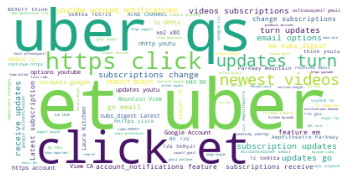

In [0]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

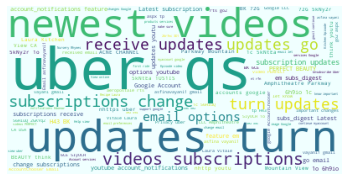

In [0]:
#Add more words to ignore 
stopwords.update(["et","x80", "https", "click"])

#Redo stop words. Limit number of words
wordcloud = WordCloud(stopwords=stopwords, max_words=100, \
                      background_color="azure").generate(filedata)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYEAAADKCAYAAABDsfw/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzsnXV4VEf3x7/rkmSTbNw9eHB3dygFCoVCkSptKbW371uqvyo1aKlShVKsOMU1aHAIECTubpus2++PJWHv3rub9STkfvr0edi5MufOTO65c+bMOQy9Xg8aGhoamrYJs7kFoKGhoaFpPmglQENDQ9OGoZUADQ0NTRuGVgI0NDQ0bRhaCdDQ0NC0YWglQENDQ9OGoZUADQ0NTRuGVgI0NDQ0bRhaCdDQ0NC0YdjNLQAA1AL0tmUaGhoaG/EGGI7eo0UoARqah5HS+jqsPHUSWZVVKK2rg1StAo/FQpy/P7qFhqJXeAQGRkWDxaQn5Pbyy4XzuFZUiLzqatQqFJCp1QgTeSPOzw9dQ0MxNDYO0b6+Tq2zXFqPj44cQWZlJarkMqi0WnhwuAgReeH5/gMwKDqmVfUpoyXEDqJnAjQPE2dzc7D20iVczM9rcmCHiER4smcvzOrazS2yPSyk5OXix3NnkVpcbPE8BoB+UVH4Ydp0h+uUKBX49vRp7Lp1Exqdzux5oSIRlg4cjLHt2jlcZ1M4YyZAKwEaGifRd/U3UGm1dl0bLRZj3azH4cXjOVmqhweVVotX9+zGmZxsu66f3bUb3hw+wubr7pWXY9E/myFVqWy+dmhsHFZNmWrzddZCm4NoaFoAWp0Oyw/up1QAXjwe+kdFIczbB4GenlBrtNh8/RoKJbWE83KqqvDG3j346dEZ7hK71fHFieOUCiBGLEafiEiEibzB57BxvagIKXm5qJTJCOdtun4NMWI/PNa1q031vrx7J0kBcFksDI+LR7RYDB8+H8V1dbhZUowrhYWE85KzMm2qqzmglQANjYOwmEz48gWk8h5h4fh5+gywTezDc3v0wL+30/DZ8WOQq9WN5efz8nA0Ix0j4xNcLnNr41ZpCbbfvEEqXz11GgbFxBDKZiZ1hUanw7Ybqfjm9ClCG39/9gzGJCbCR0DuL3OU1NWRyvYtfhp+QiGpfPq6tciqqiSU3SguRpeQEKvrczetZ/WChqYF88aw4Y3/DhN5Y/XUafht5mMkBQAATAYDUzp2wprpM8FlsQjHfk4553JZWyObrl2DzsR07efhQVIADbCZTMzq2g2rp04j9IFEqcDeO7etrjezspJU9ljXrpQKAAD+mDULHQKDCGVfn0q2ur7mgFYCNDROgMlgIDEgACPi47Fx7hNmX07GdA4OxrP9+hPK0isqSKYiGuBkVhap7KUBg5q8rmd4OGZ0SSKUnci03kSz7vIlwu9osRivDxlm9nwRj49Pxo0Hx0i5XysqwuWCAqvrdDe0EqChcRKb587DV5Om2LS4u6h3H3QPDSOUbb9BNnu0dSRKBeF3hI8PpnbqZNW1Lw4kKovLBfnQWvDuaWD/nTvYnXar8Xe4tw+2z19AeMFTES0WY8/CRYQV2xd2bieYpVoS9JoATZugXqnE8cxMXMjPQ3pFOTIqK8Fns+ErEMLfQ4huoWF4YcBASvONqwkViXC16MGCYrVc7nYZWht8NsfqcwUc4rl6AFq9HpZf5cBpk0XoEfHxVrviBHl6oUtISKMLq1KjwbncXIyIj7fyDu6DVgI0TudoRjpe/3cPoWxR7z54aWDT03dj9ACWbN+GlLzcxjI+m42/58xFrNjP6vt8fuI4tt+8AaVGQyiXqlSQqlQoqK3BtaIiHLh7B8/3H4BJHTqCyXDY885q+CYvKbWdbqaupvuqr0lltvars/q0Si5r+qT7lNXXE357cLmktRgqrhQSTTi9wyOsrhMA+kREEvYxXCzIb5FKgDYH0TidkfEJmJlEdMP789JF0h9VU6y/cpnwsgCAN4ePsOllkZyViY3XrpIUABUldXV479BBzN+0ERVSqU2yOkKdialDxOe7rW5bMO1TwNCvtmBvn3pwuYTflVIpiiQSq+q8kJ9H+N0xKMjMmcT7m3oFdQ4Otqq+BpJMPIKuFxWaObN5oZUAjUt4fchQJAYENP7W6fVYfmA/6pRKq65PryjHd2dOE8rGtWuPRzp1tlqGTdeu4tU9u60+v4FbpSWYt2kDpWeIKzB9mUX5ODfMgbMw7VPA0K/u6NOB0dGksh0ULqOm6PR6bLh6hVA2OCa2yesyTPpeLBTa5FYKAAn+xLbKrKoieTi1BOgdwzQuZXfaLbx36CCh7KOx4zCxQ0ez13x2/Bg2X79GKNsw5wl0CAy0qs5CSS0e+2sdZEYLcR0Cg/C/ESPQJZjaX7tGLsfwn38klV9d9qpVddpLclYmlu3e1fjbRyDA0Weec6s5ylbs6VOAbE7islg4/9LLVtf77LatpK/6TXPnoZ2JYmpg562b+L/DhwgvlzeGDsOc7j2arOvb06fwh9EsZ3RCIj6fOMlqWRuY9PtvBG+vnx6dgb6RkTbfxxzO2DFMzwRoXMqUjp0woX0HQtmnx4+ZdYM8nZ1NUgAArFYAegDvHTpIUAADo2Pwx2OzzCoAwPDyfb7/AFL5qWyya6Iz2XHzJuH3qPiEFq0AANv7FDD0qymvDB5iU73vjh4NTxPPq/mbN+Lvq1cIX9hKjQZfJJ/AByYKYGR8Ah63QgEA5HUEX6Fts4AGxCb7CYrrrDNhuRNaCdC4nOUjRxF+S1UqLN+/n/Lc9w4fJJUNj7N+Me1kVibJJ/uz8RPAYzftA/FUn77oFhpKKPv94gWr67aV22WlpLACVHb3lsjykaMQaWS2auhTKnNHlUxG6tfhcfGY3a27TXWGibzx+YRJBBdNlUaDL5NPYPbf65GclQmdXo/p69aSTEBDY2Px8bjxVn8215qs03jz7Fun8RYQr6tVKMyc2XzQSoDG5Qg5HJJv9fXiIspzq0zivYSIRHh/zBir66KaRZh+PZqDyWDgyZ69CWXXiopwr7zc6vqtRavT4aOjRwhlg2JiSDb3loqQw8GKCRMJ/Xq9uAi/XjhPOvf9w4cI/WprnxrTPyoKX02aDKGJR1V6RTmW7d6FoT/9QJqRMBkMfD15qlUfAg3Um6xzCEwWpq1FYOLKau36iTuhlQCNW6Ca+t8wCQO8yeQFzmIy8dn4iRDZ8BWWkkv0PLHlWgAYEhtL8is3tUM7g98uXkBaaWnjbw6LhdcGD3V6Pa6kfWAgqV/XnE8h9Oum69cIJjV7+tSUwTGx+OOx2ZR5Akxf3h0Cg/DbzFk2m9gUJt5kfBsUiDGmY6klbhijlQCNW3i8W3eceG4Jgr28Gsvmb96I9w4dhEqrxay//8KK48cajw2IisbFpctIbnZNYWqMeKpvX5uuZzIYGGFifvonNdWmezTFyDU/4cdzZwllKS8uRbRY7NR63MHj3boT+lSr02H+5o1O7VNT9AAuFxagStb0prrbZaX4J/W6zXWYKgEOs+l9BVSYzoAVtBKgact48/n4ZPwEwlfZ7rRbeG7bVoLJxd/DAx/ZYL+1RKSPj83XmJqPahXO28ErV6tJJi8/obDFLwZbwrRPAZD6FIBT+rRSKsWz2/7B5yeOE0JJsJlMTGjfgaCQGth357bNszk2g/hqtNe10zQ8RUvMOEbvGKZxK91Dw/Bc/wH44eyZxjLjkAlMBgOfjJsAXxt9sgHqnbbG7pf2IlEooNPrHX5R6/R6/G//PkIZm8nEF5MmO3Tf5qapPgUM/WpPnxqTX1OD57dvI9n8B8XE4M1hwxHu7QOVVotxv64hhd5YsmM73hoxEo927mJVXWwW8WWt1Tcda4gK0+uaijvUHLQ8tUTz0LO4dx/0iaD2lX66bz/0jrBte34DEhctuukBq3YcN8UXySdI3kDLR44iBZBrjVjqU8DQr45QI5fjue1bSQrg7ZGjsHrqNIR7G2Z8XBYLuxcswmNduxKUtlanw4dHDlttGjJd0LXXjKNQE8eNLYvT7oJWAjRuh8lg4ONx4ymPPePAy6LOhe53ju5m/OPSRWy6dpVQtrBXb5t2QLdkGvrU1C8eMIRzdqRfAWD5gf2kndU8NhvTTcJEAwZz3v+Gj8RPj86Av4cH4dhnx4+RwlZQIeITTYL2LujKTK4TtcD0obQSoGkWzP0xOGJyqVO1PPc7ANh75zZWnz5FKBvbrh1eGjS4mSRyDSIeD2IBWQlE+vg6bEo7m5tDKvtk3ASL1/SOiMBfs+cgysiLSKfX44PDh5rMF+xtkinOdN+AtZiuJ3m3wLhQLW9uQvPQQxVltIHBP36PTXOfQJjI2+b7CjlkX+51sx+3uFPY1fT/7luSp8npJS+SAqK1diz16Y6bN3A4/R5OPf+CXfcuNpkBMBkM7FqwsNEEZIlgLy/sfHIhIWRFSV0dZq5fh32LnjJ7XfewMEIugdulZTbLrdPrcaeMeF1SSKiZs5sPeiZA41aKJBJ8cPgQoczYZ7xeqcT/9u2DxoqkH6aYTv0BoFbefDs00ysqSAogVuz30CmApvoUMPSrPX0KGDbsGdM5ONgqBWCMqS3eVLGYYhrVtKC2xqb6AEPoCeNnZjIYiLDDW83V0EqAxm1odTr8d/9ewq7JTkHB2DT3CcI0+UZJMSnapDVQTbWzq6vsE9ZBiiQSLNmxjVAWJvLGT9OnN4s8rsS0TwGQ+hSAXX0KAPkmL2B7ZnadrAgfbUycnx/BhFUtl9uc7Ce9gugiG+njY1UeA3dDKwEat7H6zGnCblIhh4NPx09AiEiEd0cRwwisu3wJZ3NyHK7zZklx0yc5mSqZDM9t30rISeDv4YGfps9AgIen2+VxNaY7v4UcjlP71FTB2ONqamsYaA8uF3F+/oQyW8eSabt0bkazpCVoJUDjFs7m5pCSdr85fETj9HhEfDymGflw6wG8c+iAw8ldLubnO3S9rUhVKrywczvyax58vXrz+fjp0RkI97Z9naOlQ7Vg++bwEQCc16emIRtUdmReq1daXgimold4OOH3xQLbxtJ5kw1qPU3u11KglQCNy9Hp9Xhhx3aCm2WwlxemdCQmCn931GhCjt8qmQyjf/mZMiiZOToEEqf91XK529I1vrJnFwb98B1hMfCXGTNx4rkliPOzPhtaa0Cn1+PZbVvxwo7tjWXBXl44+fwLhH59d9RobJgzt7Ff7elT0zAT/95Os9ll13THMNcKf/3Xhw4jrDP9dfkyZUhsKlafOU1ILdkjLKzFugPTSoDG5fxm8gdv8Cmndu9bMmAgqcw0zo4lFvfpQypbbact2lZOZBI3grGYTPSyMS9ta+G3C+cJL9aGPvWicP3tEBhE6tcfz50lLfiao7fJJrQiiQTHMtKtlpVKYfS1sLGtASaDQdph/NXJE03ORHKqq7H+ymVCGdV+hpYCrQRoXMqVwkL8lHKOULa4dx/0CKPeJftkz16kHcM6vZ4QJ8YSI+MTSNPuv65cxtenkm3+elRptbhdVtr0iQBWnTpJ+M1kMPDR2HE21tg6sLVPAUO/GmMIobHXqvqoInh+cuwoweRmDj2AlSeTSeXWfpU/bpLzIKe6Gl8mnzB7vkSpwNsH9hMURahIhNEJiVbV1xzQ+wTsYMiylQCAKQOS8PpjI5tFhknLf4REangxnlz1SrPI0BS1CgXe2r+PEHyrS3AInu3X3+w1TAYDH44dh1nr/yIk4Hj/0CF8PXmKVfV+MGYs5vz9N0Fx/HX5Ms7n5WFJ/wEYGB1DMDsZU1Zfj4v5eTifn4fkzCy8NWIkycRkyu60W1hrst4h4HCw784d7LtzxyqZqfh26iN2X+sq7OlTwNCv3nw+oU9NE7k3db1xnVUyGZ7YuAGHn3nWrMfNnbIyrDp9EufziKagXuERGBFvXaIiqgXlf1Kv49l+/eFHsTt60ZbNpNzUSwcNbpExgxpoU0rgkw0HceBCGphMBgK8PdE5JhQLx/VHZKBtib3//eR5PPv1RhdJ+YAhy1aib4dofPHsNNKxPR89jzq5wqIcEqkCFZJ6xIb4mz3Hlbx36ABK6x/8oXtwufhk/IQmIykGeXrhnVGjCZuPjmdmYNP1a5jdtVuT9YaJvPH15ClYsnM7VEZ++vfKDYlHhBwOxrVrDx+BAHoAMpUK9SoVTmdn2ZX5KaeK7IYqValcnpqyOTDtUwBW9SkAUp8CsLpP5/bogb8uE00sEqUCY375GT3CwpHg7w8fgQAcJgt3y8twvbgI6RUVpPuIhUK8O2p0k/UZ0yUkhOTpM+H3XzE8Ng4xYjG8+XyU1NXhZmkJSQEAwNjEdjbV527aVKL5TzYcxN28Uqz973wAwJ38Ujzz1Qa8+fgYTOzbqYmriTzxyZ/oFh/h0pnA55sO49DlO/jv42Mwqgf1QHrikz+x/q0FlMf+s2YnAn283D5buV1Wiic3byIsyI5r1x6fjre8zd8UuVqN2X+vR15NdWNZlK8vNsx5gpRZyhxFEgkm/v6rTfUa8+WkyRgZn2DxHNOk5M7C1UnubaXP6m9Ii+y29qsjfarV6fDLhfP49cJ5UojmpugSEoJPxk2w20OrpK4OS3ftoFQs5ugTEYkvJ02mXCdxFnSieQdJDA8Ek8lAcaUhMmF1vQzf7UzGE5/8idFvrMa0d9egora+ibuQuXQ3F8+t3Igpb/+Er/85Bpkd7mm1Ujn6dYxBUkwoTt3IsPn6Sct/REpaNnafTcWQZSsxZNlK0h/Opbu5GPXGaofkpOLNfXtJL4vlI2xXRIL7+wiMTTe51dX49NhRq+8RKhLhy0mT0Tk42Ka6xUIhZiZ1bVIBtBWkKhWpT0NEIpv71ZE+ZTGZeK5ff6yfPQejExLNmvRMifb1xR8zZznkohvs5YX1s+dgcZ++pGxhpoiFQrw5bDh+fHS6SxWAs2jTM4HiylrM+vB3vDJjBKYN6gq5Uo3PNh1C/w4xCA/wQUFFDU5cS8dnT08l3cvcTOBKej5e/XEbJvTphN7to7Dm3zPwE3ng2xdngsm0XmnvPX8Lw7slYG/KTfy67yz+/fh5cNhku6K5mUBJlQSv/bgd7SKD8MxEg2dGsFhEknPlkhmoqZfZLWdrIqeqCiezs5BaXIwL+XmQqdVgwBBzyIPHRd+ISMT7+6N3eAQSAgKcktSGxnVUSqX44dxZ3C4rQ7VchjqlEgqNBqEiEcJE3ugeFoaeYeHoER7u1L6sVSjw/uGDSC+vQKVMCpVWCwGHgxAvEZ7q0xfD4+KsckF1Bs6YCbSpNYEGFCoNcksrsXpHMjz4PAzrZvjaE/A4+ODJiY3ndY4JxTfbjtt079/2nUXn6FD8Z7bB7hgVJMaCFX/h5I0MDOtq/Vfl6dQMTOzbCQM6xWL1jmRcupeH/h1jrL4+WCwCm8WEkMclvPxN5eweH+6QnK2JaLG4VaZwpKHGz8MD79ho32+K52f/AK1Gi4+/n4+AIOqZgzefj5WTyR+GrZU2Zw7KLqnEmP+sxtNfbYBKo8HKF6bD15O8yt+AVKGy2v6o1mpxK7cY/TpGN5bFhvgjwMcTl+9Zn95OoVLj4v3zw/x9EBUkxqlU201CrpaThuZho6y4BpXldUhPs24Pw8NAm5sJxAT7NZqDTFm59RgOX76Dlx8djq5xYfATkaNSWoJx/z9HLWxfbjmKYLEI52/nAABmDu2OL7ccxbg+HZEU63gWKmfJSdNyyM4oxeuLf8MTzwzHtLmW3TVpzLMt+a3mFsHttLmZgCXO3MzCqB7tMbZ3BwSLRZQ2eEuwWUwkxYUhJe3B1vKs4gqU19Q3ml2aQqvT4VxaNoYlJaBvh2j07RCNyf2T4OslxKnUzKZvYASfy4GSIiOSM+SkaVlcv2hdOAMaGlNoJWBEeIAPrqTn4VZOMTKLKvDX4QuU59XUy6HV6aFQqSGRKQjmoqcnDMDtvBKs2HQYJ66nY/lve9A+MghDrbSzX80oQJ1MgUFd4hrLGAxgQKdYnDTyElJrtY1ymMrQQMfoYJy5mYWTqRm4k0/c+dog59WMArvkpGlZXLvw8O1JoHEPbdo7yJSC8hp8ueUI0nKLwWaxMKhzHA5cTMPxr19u3Azzy94zlMrBeNfutYwC/PzvaRSU12Bwlzg8P2UwvITWpZVbufUYTqZmYPsHz8A4I9/pG5l467fdOLnqFbMyfLBgIoZ3e7A9XSJT4Kt/juLS3TzodHrs/2wJ4fxrGQV47aftEPK4Nsv5MKPXA/MmfgW5VEkwD2z6/ST+WWuIQ2RcvmvTeaz78SihrLSoBicP38S+bZcgrVeAw2UjKMQHXXpGY+GLo0h1zh61AgwmAxsOvIHK8jpsXXcaxw/eAI/HQXR8EMZO7Y6BIzoSrqksr8O2v84gJ7MMd28WmH2eTYf/Aw7XccvvNx/txsnDN/H2F7PRvU8s7qUVYtfGFFw6lwGRtwBx7UIwa9EQxMSTd1jXS+R49+W/UVJk2B8QHOaL/kPbY+aTgyzWmXWvBId2XcHpY2nQqLUQ+QjhH+SNLj2iMGJ8VwSFkpO0bPg1GZfOpBPq+vi7+RAIqZP5rP3hKHZvJsa3Wvnn04iMCaA8f/mL6xAR5Y/n3qDeH1Ffp8Diad9Ao9bi1fceIfWbvW1BBe0dZCNvzRlr8Xh4gA9WvTCDeM1c4jVPTxyIpyeSg5wZ0y0+HD8um22XjK/MGIFXZowglQ/qEteoaKyRAQBEQj7B24lKzqNfLrVLzocZBgOITQjGrWvEhOR3blC/aHMyibOsijIJXpz7I3Q6PRgMgC/gQi5TITerDLlZZRg7pTtCI8lRRVVKDS6nZODbj/dAWq8Al8eGtF6BW9dycetaLvKyy/H44qGN50tqZbh7yyATh8OCWq2Fr58nvH2Jjg4MB/P7mlJVXoeTh27iuxX/QqsxzECrKupRVZGOec+Rx27GnWJ8/OZmSGpk4PE50On0yM0sQ25mGYaM7kz5Itfr9Fj74zHs2UJ8OVeW16GyvA53bxaQXq4NdW376wwAEOp6ffFvePerxynr6pAUAUmNDJJaGa6kNG1yHTG+K/78/ggWvzyGUrmeua+wPL346DOYuMnTnrZwNW1KCdDQWEt8e6IS0On0uJdWiJiEIGSnE1/6OSa//QNFGDSqE0TeQsx5aih4fA4UchWSD93Eb98ewt+/JuON/3uUst4v3t0OsZ8nlr07Fd37xKEwrwI/fbkft1PzsW39WYyc0BWBIYYXRUx8EL76zZAn96V5P6MorxITp/d2+cLwhdP3cP1iFvoPbY+JM3ojONQX+TnluHElF2Emyq2mStr40vv6j6cQFRsIvR64d6sAP3yxDyuWb8UXvywCi020TG/8/WSjAujRLw5Ll08Bh8NCZXkdbqfmoyC3kvSl3lBXUs8YLHhxJKGut15YZ7auPoMS0WeQYQY9fegnTT7/gOEd8MPne3Hh9D1KRZR88AYAYOCIjuBwHqwr2tsWroZeE6ChoWDMlB6E3/t3XIJSocb850cgqWcMFHLD7urs9FLkZZejS89owvkvL5+ChS+OAo9v2F3KF3AxdmoPvPb+NKQk32n8gjal98AE/Lj5BfToGwcGAwiP8sdHq+chMiYAep0eB3Zdcf7D2sjNq7n4c88reOXdR5DYMQwiHyE6dYvC7EVDCOfpdHq8+MRPkNTI8NTLYxAVGwjAMNNq1zkc36x9BrlZZfjy/e2E63ZsOIdtf50Bj8/Bur2vYvmKWfASCcAXcBEW6YdRk7phwQsjzdb13tePk+rq0CWCsi57aDArrfpwF2qqiQlyNv9xCndvFSI82h/PvPogiqy9beEOaCVAQ0NBcJgvPL340GoNL+sGU1BMQjDi2gcj/bbBjzw7wzALiG9nXepAkY/BVKMzs/ekXSdqF2BvscFdWaXUUB53J3HtQsAXUNvXjcnPLodcakgNmdDRvGtzQQ4xHs+9tEIAQPvO4fDwtG6NyrguKoLDfSnrspfAYG/odHqcOnyTUH7ykOH3iPFdzcpnS1u4A9ocRENjhpjEYBTmGcwOd24UICDIG14iARI6hOJeWhG69IhGToMSaE9UAlqtDhdO3cPuzedRU1UPmVQJlUoDtdpyQhJvnyb2prQARw5vH/ObK42pqXrwlfzms3+YPa++jhi5tfb+df5B5J3u1tRlyaRjWpe9DB3bBf+sPY0TB29g8mN9G8tLiqrBYjExdAwxX4G9beEOaCVAQ2OGuMRg5GeXQ+jBQ1VFHQaNNNh/EzuG4fj+VABAToYhlWSckRIoyKnAire3oii/Ct6+HggNFyM6QQA+n4t6iRxXzptffGSyWv7knGFlbCnj+P+eIoFZNxZPL+LXfsN1TBsWtI3r8hKZTypvWpe9jBifhK3rTiMnoww5GWWIjg9sPNa9byx8xERlbm9buANaCdC0GPKqa/Bd8mlkVlaiSiqDVKUCm8mEJ4+H4Ynx6B8dhX7RUeBz3DNs49qHID+7otEDpF1nw0Y6Xz9PZNwxxJfPzy6HyFvYGGdGr9M3KoDwaH98s/YZwj2vX8q2qAQeJoxnDJ/9+CRCwq2L2yTyNlxXWW590hnjuv7c4/okS4EhPujYNQq3ruUi+dANRMePbFznGW5iCjKVz5a2cAct/7OD5qFFqlLhnb0H0PPzlej5+UpM++UPHL2XjpzKKkgUhg1wSo0GlVIptl69jtd27MbAlavR8/OVGPP9GpfLN2BYB1y9kInjB1LB43MwduqDxeLqynr8s/Y0JLUyjH3kQXlaah6K8g1JZl5/n5gMSK8HdvxNTMvoLDw8DSGLS4uqmzjTfcQmBmPMFEN6xi/esX7Bc8GSkWAwGbhyPhN/fm9d2HDjuty1brJ8xWPgC7jYvfk8bt/Ixy8rD2Di9N7oN4Sc+8PetnAHtBKgaTYWrt+Efbdu23VtpVSKtecvNX2ig5QV1yInvRTx7UPAMjHVXDxjSHYeZ7QoHBEd0BiKe+emlMbyovwqfP7OVty+ke8SORPvLzYmH76JqxeyoNfpodPpUV1pez4MZzJr4RD4+nkiN6sMKSfvoqZaCpVSg4pSCe6lFeKtJWsblWYDoZF+GHdf4e7Zch5fvb8DMqkSCrkKJYXVuHgmHWu+PoDcrDLKut5aspZU165N5ynrcgQaWLRPAAAgAElEQVQen4MBw9oDAC6fzcDFM+kYPt58Qnl72sId0OYgmmahVq5AZgU5FZ8tfJt8CiwmA0/07ukkqcjU3ncBHDSKmHmOzWEh867BJGSsBEQ+QkyZ1Rc7N6bgxIEbSE8rQm2NDPUSOQQePLy/cg7efvEvp8s5ZVZfnDp8C5JaGT56YxM4HBY0Wh24XDY2HHzD6fVZi4/YA+999Tg+e2srvnhnG+U5VFELFr44GgqFGsf3p+Ls8ds4e5z8sTB4NLFPGupatuAXq+u6cj4T547fhkymgqz+gXfRyg92wlvsAaGQhz6DEjFsXBfK+42Y0BXH9qfi6L7rkNTIEJNgPh+1vW3hamglQON29AD+s+tfs8ej/cToGBwEX4EAap0WxbV1OJVJHRtn1fGTiBaLMSjO+lwL9tCuEzGwXkxCENLTiuDr5wmxvyfh2LznRiC+fSj2br2IjDtF8BF7ot+Qdpg5f5BNHi+24B8owoqfF2Dzn6dw43IOaqqkCAr2QXyHUJfUZwsRMQFY+efT+PjNzcjLKodUqoCXlwC+/p54cslIhFLYx1lsJl787yQMH5eEI3uvISX5DgCDkg0K8UXPfnGUYR0iYgLw1MtjkHLyLqGufkPbo9/QdqS60tOKcOz+Ir8xednlQHY5AMMXvzkl0CEpAsFhvigptM4MZ09buJo2FTuIpmWw/uJlrDx+kvLYpoXzkBDgTyo/dOcuvks+g8LaWtIxPw8PbFk0Dz4C814hNDQPI86IHUQrARq38uXRE9h4+SqpfHH/vlgyeECT1ys1Gjy1YQvSSoihGlhMJv5ZNB9RYl+nyUpD09KhE83TtCpkKhV23bhFKm8XFIjnBlkX74bHZuOjSePBYRFzPWh1Omy41PwhFWhoWhu0EqBxG/vS7kCmUpHKXx46yKaNQVFiX8zoRvbC2GunpxENTVuGVgI0buPQnbukslg/P/SNjrL5XnN69SCVySmyqNHQ0FiGVgI0bqFGLsfV/EJS+fhO7e26X6i3a7xsaGjaGrSLqAOsPX8J3yafIpVH+vpgw4InIOBw7L53QU0Npq4hB5r6/rFH0c+OL+cGrhYUYu35SzibnUOZktIUJoOBAbHRmN+nF3pG2J9/+JczKYT4KQAg4vOxsF8fu+9JxdWCQnQPNx+lsaXi6rH0+J/rIVMRZ0oMAN/ZMZ5uFZfiRHoGTqRnIqvStr0e7YICMb1rF0zp0om0ruMILVGm1gLtHeQAegBL/9mBs9k5pGOPJHXGO+NG23VfrU6HhX9vxq3iEtKxy/+xPy7Ksm27zPrbW8P+JU8j0NOz6RMpmP/XRtLzDIiJxuqZ06gvsILBq74jvdheGDIQi5ysWNxBc4ylBf1646Uh1qc03H79BjZdvurwJj8ACPfxwfsTxjissJ0t065nFjp8H3dCewc1MwwAH0wcC39Pcvjfnak3yRdYyc9nUij/aLuG2b/x50xWjkMKAADm/Lkel/LsC3uQRfFHGhdATrFoC3H+5P0E98rKHbpnc9HUWDp2L8Ou+1oaS0sGNe2S28Dd0jJ8fPCIU162gGF28szGfxy6hytkSs5oG8H9jKGVgIOIhUJ8NHE85bHyetvjtlwtKMQfKeQk8iI+H59Mpk5s3RR7bt7Csm077brWmGqZHC/9swMnM2xXJlSLttFix3ZHxvqRr88od39SDmfRMJaoPKU+PHDY5vHU1FhiMa3/84+j2MDnKDq9HjeKiu2+3hUy/W/3Podkao3QawJOoHdUBGX5u3sP4odZ062er9UrlXjn3wMk2zkAvDd+DIJFXjbLduRuOv5v/2HKewLAiMR4xPr7wZvPh4DDgUShxMnMLNwqLoFaS06AotJq8ebuvVgzewa6hFqXTcscji7uhnp7k8ryq2ug0+ttcjltSfSOisCifn3w6zlignWJQmHzeHLmWGJbUBhsJhMxfmK0CwpEkJcXRHweGAwGqmVy3CwuRmphMZQa6sieHx44jM2L5ttl07BFplBvEaQqVZMyKTUah2RqjdBKwEl0Cw/DtQKi98uF3Dysv3AZ8/pYF+Dsk0NHUSyRkMof79kdwxLibJYps6IS7+87SPki6B4ehsX9+6J/DHlR8Mm+vVCvVGLj5atYf/EK6pXEtH0qjQZv7voXmxfNhxePZ7NcDQR52a7UjAn2Jl+v0elQIZXavXbREnh2UH9cyi9weDw5cywBgBePhzqjsRDm440hcbFYOmwwuBYWVCUKBbZcuY4fT58lHcusqMSRO/cwun2i02R6d9xoJIWFNinT2O/XQEXxoeOoTK0NemHYiSRnZOLV7btJ5bF+flj/5Bzw2NQ6t7C2Fo//sR5Sk41UHlwuNiyYi3AfH5tlMRef551xo/FIUmeKK8xTWleP2X/8BYmCmPqOyWDg4hvLrLpHz89Xksou/ecVh7620kpKMW/dBlL5V9Om2P2ia0lQtRkAnH31JbNjCbA8nk4ue8FueeqVSuj0eoj49mW/Op2ZjZcpzJJcFgvJLy8B18IztSaZ3Am9MNzCGBofh9k9u5PKsyorzQZMA4C39+wn/cECwNvjRtmlAADgj5SLpLKpXTrZrAAAIMjLE6+NHEoqN2dishZHR68HlzrZeZ3S/XlaXQHVWAJgcSzp9HqL48kRPHk8u1+2ADAoLoZyY6BKq8WNIvLidWuVqbVBKwEns2zYYLQPCiSV/3P1Ok5nZlNek2pmIWpMe3KGImupkctJZc9bEaDNHOM7UG/qMmfrdQcCLrXvvEShpCxvbdgzltacSaEcT4927eLQeHIWM7tTJ13Jr6lxsyQPaIkyuRNaCTgZDouFz6ZMhJDiK/WD/YdIZdcLiyjvE+8Cz4cAB+zk5jxJzufk2X1PR+Gbmao3p2JyJk2NpSqpjFB2vbAIv5ksKAOGsfT6yGGuEtMmeoRTbzik+mhxFy1RJndCKwEXEOHrg7fGjCSVV8mIf7RSlQpv/7ufdB6fw8ZnUybaXX+BG79gLucXuK0uU8wpJo226Z3QrQVLY+n9/QcbfzeMJVMTXcNYsrSG4E68BXzKRXvT9SZ30hJlcie0EnAR4zu2RzSFH3v/r1cjq7ISB9LuYMiq71FUS/TgmNCpA8688hJiKK61lh9Pkb0wXBVn/+jddJfc1xpYDDNKwIpwGK2J8R3b48wrL5HG05msnMbx5Kqx5ApCKFyDmzv4X0uUyV3QSsCFfDZlIsm7QKXR4M2de/Hp4WOk86PEvvjfaPJXn63cKyNvmHKGEqD68i6zY0Ocs9DqqV/2lvzHWysNX/TmxhMVzhhLNA8/LWOO+JCSEOCP10YMxaeHjhLKqQJccRvtv/YHCgMM3iF51eR8pyczssy6HDqCVqeDSqu16JPtKswFwGOzHj4lANg+nhwdSzRtA1oJuJgZ3ZJwMTcPR5owm7w6YigSA8mJs22lWiZzuzlEpdE0ixKQq6kXgJtDFncxo1sSSQlQ8eoIskuvq6iRy5FZUYm8qmqU1tWjQipFiUQCmUoNlVYLpVoDpUaDWoUCSo2Gcie6q2XKrqyEVKUiyNQgj7tkaqnQSsANvDNuNNJKSkk22wZGJiZgZveuTqmr0sRjxB00104/hRmbrZcDfuOtgVBvkdmxBDh3PJlDpdHgVFY2TmdmYzdFytDmoEGmb46fQmFtbXOL02qglYAb8OTx8OmUiVj892bKr/R3x9sXJpiK1uTRIFEoHNroY84LKsLODXatBUtjKczb26njyZjfUy7g17PnW5QLbkuUqbVBKwE3UK9U4n+795o103x08IhDLqHGMM14zAyNj8PwRNeEUjDnr98U1TK5Q0qgWkbtxx0kar1xg6zB0lgqrK116nhqQKZS4/uTZ6w6lwFDhE8RnwcPLg8CDgcCDhtiDw8IOGxsvHzVbN+5SiaxUAixh5Agk9hD2Cibs2RqjdBKwA18eOCwxen74Tv30CcqEo927eJwXeb8wUO8RZjcuZPD93cmJXV1DnktUQVIYwCtOnicNVgaS4BzxxNgcLl9edsOs8d9hQIMio1Fz8gwtAsMRKSvL/gc86+WvbduO/zCtVWmptbbnCFTa4VWAi5m69XrTS4KA8CXR0+ga1go4vwdS7Qi4lNH9WyJux+Lm3iZ2XN9kMjroU4RuPXqdavO+/LoCacpgR9OncEVivzQgMH1eOviJ90eutuSTCumTsSIxIRWG07c3TycvnQthPTyCnxFEewr1FtE+mJXajT47669UJjxeLGWIC/qr+DqZlgwNkbsISSVZVdWOXTPLIrrqbKNPSxYGk+mKDUah8cSYJh1/H3xCuWxkYkJ2PDkE25/2TYl06h2ibQCsAFaCbiQ2X/8BZXJgtVLQwdhz7OLcfbVlzA0nmijz6qsxMCVq3Hw9l276+Sy2aT7AsD53OaL8QMAs7p3I5XtvnHLIc8iqgxQzvr6bWm8v++QxfFE1eeOjiUAWLZtJ+X6w/r5c/D5I5Msmn3MUSypc6lM9uCoTK0ZWgm4iH23blOWz+/Tq/Hf744fTZlT9uODRxyK/5MU5ljGL1fQI4IcpEuiUDg9HaSjictbIvtu3caem2Q3zF6REY3jyRVjSaXRUM7Wov3E6BAcZNc9a+RykiJr7TK1dmgl4ALyqmvw6WHyhh4Rn0+YpvoIBPhgwljSeVKVCv/bvc/u+gfHxdp9ratICguhzELm7MTe3oKHa4+ApbH04aRxjeOpYSyZGkEaxpI9GwjL6uspc0YkBti/qfFibr7d1wItU6bWDq0EnIxKq8V/d++FTEXeyPTOOLL/dj+KhBaAIWuWvZhbXE5vxiTsbCYTQ+LJyulA2h277kflGfSw0dRYMvWC6hcdhTm9epDOTSspxerk0zbXr9RQ76IVCwU236sBc3kQrKUlytTaoZWAk1l1/CTulpaRyqd17YIRifGU15hzXzuT5dzB+fmRYw5nA3OECZ06kMqyK6twLjvX5nttvHTVGSK1aOwZSy8OHUQ5nv6+eNnm8eRpJn+0wk7TSWFtLQ7ctk/pN9ASZWrt0ErAiZxIz8TmK9dI5VFiX7w+YpjZ6z6ePJ7Sv//dvQdRbmeUTrGQ7I1zJb8Q6y9etut+zqBvdBQifcm7eVcnnzIbDI6K/Ooa/EPhKtk3KtIh+VoaVGMJgMWxxGWxKMeTHobxZAu+Zr6uc6vIAQqtYdXxkw7HtWqJMrV2WO+//35zywAl0PxCOMiivzdj3YVLpPJXhg/Bx5MnWIxs6SsUYnH/vrhTWkYYzAqNBusvXgEDDPSMpM5+ZI55fXrhcn4ByZf+fE4e1pxJQVldPTqHBFNmrbJEUa0E266n4sODR/DzmXN4sm9vq69lAJjZvSsO3bmHWvmD8BaVUhl+OXsefDYH3cJDzV4vVanw6vZd+PLoCWhNZjQ9IsLw8+yZNj1LS0Wr0+GpDVtQWkf2WHll+BDKRXZjGsbTmjMphHKFRmPTWGIxmaiol+K2yWykRFKH4to6DEuwbge6WqvF18eSsedmmtlzOoUEY1BsjFtl6vPlNxbdlK2VqTnhAx84eg96JuAkqNJE9o2KxNzePa2+x7vjxsDPg+zh8cvZFLMbY8zBAPDhxPFmU0ruTL2JKWt+x/ncPIueEXK1GndLy7A/7Q6mrPkdk3/+DauTTyPHTh9/FpOJN0ePoEwy/23yKbPrFkfu3sPjf66nNB2xmUyLX8etjR9Pn3PKeHLGWBrVLoGyfM/NW/ji6AmoLETf1On1OHYvA/PWbcAmM7Mae2hKJksYy0RjgKFvRhtxA7XNF4jSKZzPzcOSzdtI5QeXPEPptmeJc9m5eOmf7aQGCfT0xKaF82z2frlbVo5nN/6DOqX55OtcNhuh3iL4CATw5vNRp1RAqlKjWiqzmDTGW8DHsZeet0meBj4/ctysuSPWzw8dggPhKxRCo9WiWFJn0YvopaGDsMCGGUlL5nxuHl7csp20duMjEGDzwnk2jSdnjaXFG7bgWgG14gj09MTb40Yh1NsbQi4XCrUatQoF9ty4hZScXFKIi3aBAZjfpxeWm6RVfaxHV7w5aoTVz2ZJpoX9+qB7eChBprSSUlzJL3CpTM2BNyi/p2yCDhvhIFVSGd759wDlMVsVAAD0j4nC4716YMMl4o7Isvp6vLfvIFZNn2rT/doFBuCXOY/hhS3bUSmVUp6j0mjs/rK3l9dGDDWrBLIqKykTpVAxqVNHm0xSLZmGsUS1eG9uH4AlnDWWXh8xFIs3bKGM1FlWX4+lW3dadZ8IXx98O2MahFwu2EymQ7Z4SzL9kXIBf1h5H2fK1FqhzUEOoAfw9t4DlC/XGQ7Ec39p6CAkBJDDH5zKzLLrfgkB/tjw5Fy75XEFLCYTA2OjHbrHpM4d8e740Y5/CrUAmhpLVDuCrcHSWDJVDuboEByEjyaNt6t+Y36b8xj8PT0g5HLQOdSxDY3OkCkhwN+pMrVWaHOQnaQWFeOpDVtIXi1cFgtr5z3ulCxhVOkgI3x9sOHJuTYv6Dag0miw99Zt7Ei9gVvFtu1FCPPxRp+oSIxun4g+UZFOe/neKyvHmjMpOJGe0eRA4LLZmNSpAxb374tgkZeTJGh++nz5jUvH0pYr17HiCDmvdYSvD3Y+vdCqe1RJZfgt5QJ237hJuXeBip4R4Xh+8ADSTu7rhUVY9Pfmxt/2ml5aokzuxBnmIFoJtGGKJRL8fu4CcqqqUFxb15huz4PLhZDLgYjPR6SvD6LEYkSLfSn9/J1JaV09Vh5PRmZ5JSqkUkhVKrCYTHhyuRgSH4veUZEYGBtNufOYxn3UK5U4nZmNqwWFuFVSipzKKig1GvDYbAi5XASLvDC5c0cMiIlGmI+322U6lZkNyf2x3CBT3+hIJIWGuFUmd0ArARqaNocO1FZcc+XOrgeQK8+jtGo5okMOwwnvoFaAs9vWeXU5QwnQawI0NC2MkspXkJ6fSHksp5g6dWRO8Wjo4bwgaE3djwE2XKUAtLoq3MuLxr28aKTnxyOnaDj0evPeba7G2W3bUupqgPYOciOznvoBkjo5JoxKwktPuyYPLE3rRq9Xo15+BBx2NOmYRlsClZraVdZcub1Yup+A1xdRIdQecc4kLHAdOKwwKFSpKCxfgPDA9QDcnzDI2W1rDkv960romYAT2bH3MqY+8Q0mz10FmVxFOr751yUIDxVbvMfOfVew+pfDrhIR2/+9jPGzvsJ/PtiMQyduYsO2FHy8cg/hnKaeg8Z1lFb9F17CyQj2+xI6HdFTSKMh50+wRG39ZuQUj4JSdQtaXTWqJD9AqzO4AmcW9kJmQTdI5UdRJfkJ6fntG481hVR+FBkFxLwNFTUrkFM8GkrVLWi0pcguGga9Xk2oyyCD9XWxmD7gcuIg8pgGBsMDReXPkZ6rSvIDMgu6P3iugu5QKK9Aoy1HadVbyC4aBD00UGmyIZFuhUZbDK22EiWVrzXWo1SlIT2/HQrLn4JWVwOZoulgexkFnaFU30FJ5avIKOgChfIKyqrfJ8mn1VUT5bPQFrb2r7OglYATOXsxAyMGdwCTwcCFK/a5c15JzXGuUEZk5ZTht7+TMXxQB6x4dxbGDOuMOdP7YfkrkwnnOeM5aGzHMAs4DA/BMPC5XSBVkENI20K15Cf4eS8Fj9sJLKYvxKIlkMqPNx4XeUyHh2AkxKJnAGigVNkXSE2vV6O67g/4+/wHPG4nsFlB0OulqJM9+LgQeUy/L4N9dXHZUVBrC0jPJRYtAaAnPBef1wNsVgACfN6CRlsKueIcuOwYiDxmgM0KAYvlB2/POTBeitTrlfD1WgQW0wdC/qAm5eGwo8HjtIeQPxBsVgD4vB4Q8HqQ5GMxfUnyOdoWzoY2BzkJSZ0caXcLMW1CD5SWS3DuYgaGDWxv9fUffrUbN28XQFJnyAW870gqAODfDa+AZRR3aNnyDcjOLYdAwMGgfolYPGcIBALr3EV3H7wGFouJxXOHwFL2PUeeg8Z+ZIpT0OtlEPIGAmCgTrYPXsIpdt9PpclFccVSFGNpY5mf9yuN/+Zy2t3/FxMMhgA6vX3BCtXaAuj1CvA4D7zHuJxEqNT3nFaXwU7Ogl6vpnwutaaAdA2T6Qk2KwgqTS542o6olHwHmeIMdLo6AHrEhJ2+v7ZhgMe13vuNxTS4JzMYXDCZDUER2VbJ56x2dxa0EnASKZcywWQy0b1LFMoqJFi3+YxN1z+3YDh0Oj2Wf7wViXHBeHK24WvEWAFcv5mHmEh/LJo7GLUSOf7ceArv5u3AFx/MsqqOm7cL0LFdGPzE1PGEGjB9DrVaCw7n4U3e3lKok+2DXq9BRkEnAACDwYdOLwWTYfvOcwN6hAX8CSG//4MixoN+ZDLtj8Fvrr4HEPc8OFqXSp0FLjvq/n0tP5epTAwwUFTxLJhML4QHrgObFQy5khxNl8GwZe/Ng79LBsGg0rR8zm93x6DNQU7i7MUMdOkQDoGAi7494yBXWLdxpYEAPy8EBYjAZjEh4HMQFCBCUAAxgfi6LWfx8rNjkNQxAoP7JeKd16bi5h3yF5A5KqvqERzYtI+06XNcvWF7vH8a29DrNZDKDyPA9x3EhJ5GTOhpMMAkmBHMv+gabmKy2YwdDaX6NhgM3oP/bfnu01sXQoHDjgCT4QGl+kFKVZU6A1wOdaA3e5ApzsBTOA4MBs/q59Lp6qDRloLDjoRceRm+XovBZgUDANQaG3N1WNkWtshHvphlU13Ogp4JOInzlw2r+uNnfdVYptfrwbBkd7GBBnOTMdGR/oiNDrT6Hj7eQtTVKyyec/p8Oq7eyCU8x8qfDmLDz8857VkeViSFhrADXI954Pt8btO1pVX/A5/XC75eixvLgv1XobhiKTwEI8BkCMHnJiFIvALp+R3AZUcRPHSCxCuQXTQUWl1N47Ho0OOord+AnKLhUGvzwWT6IDb0NBiMpgPHUd2vrPoD1Ml2Q6eTQK9XIyO/E5hML8SGpSA+IhUVNV+htOp/0OnqERW8H1yOY2lO80qmgMHgg8uJQULkvcYXqfFzafV1EPB6I8RvZeNz5ZVMhVKdBi4nAZFBO8HjdkZY4FqUVb0DtbYAXE47BPq+Z7UcVG1hCdN29xCMJshnjob+taUuZ0BvFnMSz7z6B56ZP7zxd1mFBJHhYnRuT4zd/vQrfyCpY7hZF9HnXvsTndqHkY5rtDo8Mu8b/LvhFUL5vCVr8NcPz1gl42ff7MWV1Bxs+Pk5sNnUX5VffLcPwwd1JDzH6l8O44sPZpGexVHqittBr2uI6MgAg+kFge+3YPPJeZddibz6ZahlWwCwwGQFg8XtDZ7odTDZtsXr0etqIC0fDzZvsM1KgMY5ZBZ0R1z4w591rgF6s1gLQavVYWDfBPTqFt34//iRSTh3McPme/H5HChV5M0ibBYTndsTY53k5FWgopKceMQcY4Z3Rl29An9vO0d5XKvV4cKVbNJz+HoL7XoWa+AIp0Povw1C/y3ge38KWeVT0KpvuKQuSzBZERD6/w2u5/PQqi5AWvEo9DrbslUxmD5oDj92GhpHoJWAE0hNy0f/XsScrwwGcPYC8cWp0Wih1eqgUKpRV6+AVku2/bWLD0HK5UycvZBOssXPnz0Iq34+hNS0fJxOuYcPv9qFxLhgq+XskRSFcSOTsGn7eXz41W4cO3Ubu/Zfwd9bzzU+R72UaC5iMIA+PeNIz+IsmKxwsHkDwOYNAkf4KAAdNIrjTV7nfEGEYPOGguu5GALx79Bry6BRuH4qTkPT3NBKwAmcu5iBhFjyy7ikrBZZueUAgLWbTmPy3FUoLq3BsVO38dji7zFpzkqcSrlHuOaJmQPQMykaK386hLWbiJtWOiaGIq+gEm9/sg2rfz2CpI4R+Hj5dJtkXfr0aCx9ejTKKyT49pfD2LX/KhpMgucuZkDsS/ZE6dszFiVltTbVYzcMFkytgxplMiRF0agr7gxFzX+hb3Sp00NWMRv1pUMBver+uacgKQyFWr7bbhFY3C4AWNBp8gy16CqgqH0P9aWDICmKQV1JN+i1JTbfV6NMhrR8IsVz0DiLtmQKchb0mgBNs1FX3A5cj4Xgif4LwPCyrS8dDI/Ao2CyDLmGNcrTkFXMhtB/C/S6Sigln4LBDIRHwDYALOi1JagvGw6OcA743u+gvqQXWLz+EPiutloOefXL0KqvwzPwBABAp81DfUlf8H0+BddjAfR6KRTVr4LNHwkmOwY6TQ7U8j0Q+q0j3au+dBDYvAGkNYGG5+B4zAabN5T0HDQ09kBnFqNp9ei0BdAozwIwKAEwuAZbPCsU0Kshq5gNnug/YPMGAAA4gsmoL+kBRc1b4PusAIMVDK+Q25BXv4i64i4Qin8Bi9fPdjnUdxu9e1jcbvAIOAAW15AYiMHwgED8c+O5LG5vyKuXAtDAqj8ho+fgeS2lfA4amuaCVgI0zUrDmkADSslnUEo+hdBvPfT6OgBaMJjEeEsMphh6k9gzXM9noJZts0sBGOSIgED8I5jsSDCYpklcNFBJ10Et3wO9Jhc6K2PsNGDLc9DQuBt6TYCmRcFkJ0B3fyMPg+EFgA29jphvWK+rMnmhaqGoeQssThLUsk12ViwEi9uTQgEAipp3oZSsAFc4F8KA3RCF3KO4gXmsfw4aGvfz0MwE8mtq8MO5s8ioqECtQoF6lRJKjQZ+Qg8EenoiwscHCf7+6BoSip7hzvV3dybn8/Lw3PatVp0r4HBw9oWXWnW9pujUt8Fs2GnK4IDN6wuN4ih4Xi83Htdpi8Eynj3UrYJOfRceQScgLR0GFm8AmKxIp8mkURwERzANHOEM+25g5XO4Glv6+OqyV10sjYGjGen46dw5FNTWIFgkwsJevTGlYye31O0Klu7aiVPZxKCL7mpLe2n1SiCjsgJfn0xGSm4u5epyubQe5dJ63CotwYG7hrKW3iltCeKaQDV02nzwfb9oPM4TvQlpxXRolGeh11VBKfkELG43cAQTAQBa1RUoJasg8F0BJisMTE4C5FUvwiNgByVqqEQAABwXSURBVJy14Mpkx0KjPA2t6jLAEECjoA71bfjS10Kvl0GvqwGD6YmGP7GG55BXvwY2fzjpOdoq/9n7L3T3nVNyqqrw3qGDrVoJtEZarRK4WVKCRf9shlqrtek6H0HLCt5kSpCnJya074AahRw5VVWokcshU9sWh6i11OsVcpdUxgkjxlRncXtDFJr34LhgksnxHhCF5Tf+9gjYZ7McAt9vLB4X+v9DrJPTsfGL3hgG0w+eQdQb8Zp6DncQ5OmJAdHRqJHLG/93x9iyhK4FeCe2dVqtEvi/I4coFUCXkBB0DgqGv4cHeGw2iiQSVMqkuFtejrzqagyIina/sDYQLRbj43HjCWUqrRY1cjm23UjFmvMpD1W9NO4jWizG9488SihTabX47cJ5un/bMK1WCaRXVJDKtjwxHwn+/mavkavVUGjcm7/TGXBZLAR6eiLAw3II6IelXhr3wWWxmrV/mQwGYTbAZdF7JtzNQ+MdxGWzLSoAwLCg6dvCzUE0NG2JzydOQryfP/hsNtoHBuKbqY80t0htjlY7EzBleJxtER9paGian5HxCRgZ77y8AzS20ypnAlIVOfn5o527UJxJQ0NDQ2OJVqkE6lVKUpknl9cMktDQ0NC0blqlElBpyF5BLGarfBQaGhqaZoV+c9LQ0NC0YVrdwrBKo0FZvfvjsEuUCpzIzMSlgnycys6GVKWCXq+HB5eLMG9vLOzVG0NiYsFlt7ombVEYt3NGRQWK6+ogVakg5HAQ5u2NDoFB6BcZSbc1jd2oNBocz8rE2ksXUSSRQKpSgc1kwpsvwODYGPQIDcfQuDgIOZzmFtUttMi/ok3Xr2HF8WM2XTP777+aPGdGlyQsHznKpvv2/+5bi3sLahUK1CoUeGPvv41lISIRPhwzrkXHKGppbL5+DatOnTTb1rVaLWoVCqSVlmLbjVQA1rdz91VfN/47wMMTh542n5O5pK4O43/7hVS+btbj6BISYnU9iQEB2Dx3nsXz2woqjQZ9v/vW6vMdDeti3A8AsHrqNHQJCcGre3bjSmEB5TUanQ6K+jpsTU3F1tTUxvIuwSFYN/txh+SxFqVGg2W7dyElj5hRcExiIj4eNwFsF5m8aXOQGXR6PT46esSuzWXFEonVgbraOg3t/NnxYza3dUM77067ZfU15dJ61MjlZo9fLyqiLi+mLm/ANPxBpyDr037SuJa0slI8v32rWQVgiRslxVC6aYPp0l07SQpgSsdO+HT8RJcpAKCFzgRaAitOHGv84jSGzWRiVtdu8PfwgFanQ4VMhnvl5aQBptHpsO/ObUxo38FdIrdKLLVz74gIxIr94O/hgdL6etwrL8e1okLCC1ej0+GDw4fAZjKtbut7FeXoE0EdZfRaUSFl+Y2SYsryBnKriUnpOwUFWSVLW4DFZGJKx07Irq5CrVyBGrkcdUqF29IJphYX43ZZGaGs4e/YTygEk8lElUyGmyXFuFJI7v+vTibjrREjXSqjQqPBhfw8Uvn7Y8Y6njqsCVqkEhiX2A7dQ8PMHi+pq8Oy3TsJZZ9NmIhoX8ux2X0EfKvqP5qRji3XrxPKOCwWFvbqjXk9esKTR3ZH/TL5BDZeu0p4QX1w+BCifcXoSL8QKLGnnavlcvx24TyhrXV6vU1tnV5RYV4JmPniTy22rATumLxkOtIzgUZYTCY+GDOWUKbT61Ejl2Pkmp9cXv+ZnOzGf3PZbCzo2Qvze/aCB5dLOvelXTtwOjubULbj5g081acvAj1dE15DrlbjxZ07SOULevV2uQIAWqgS8BEILEb7pFqwifYVo10AOSGIrVRIpfjwCDFUsBePhzXTZ6J9YKDZ614fOgzD4+Lx4s7tjWYNlVaLtw/ux6a58+iYKBSYtjNgsL1bamdfgaCxrZ/auqWxvKGtt89fQLqGw2IRgg3eKy+nvLdMrSYcGxAVjbO5OQAMHx7l0nqzcXbulj9QAlwWq8kQJm0dJoMBsVDo1jq9+Xz8PH2mxffEN1MewX/37cXh9AeJgzQ6HbamXseSAQOdLpNMrcZLO7eTZiDP9euPZ/v1d3p9VNBrAib8lHIOtQpF428mg4Fvpj5i8cXUQM/wcHw+kRgiOLuqCpuuXXW6nA8Dxu0MGNramnYGQLkYnF1Fnaox3o/4Qk6voFYCN4qLCTO5DiazCkuzgbtGyqNdQKBLbbg0tsNkMLB66rQmPxSZDAbeGTUaIh7RapCSRzbVOIpUpcILO7aRFMCrg4e6TQEAtBIgsPbyJZJ9ev/ipy2apkwZHBNL+hpdeeok9t+54wwRHxrWXr5E+M1kMLB/8dM23YPqq5+qnR/r2pXw29Q+3MAfly4Qfk/r3Jnwe/2Vy5TXldXXExb0ZiZ1pTyPpvnYu+ipJr27GvDi8fDhuHGEshslxcgx85FhD/M3bcSgH77DNSNHhA/HjsPVZa9iXs+eTqvHGmglYMSJzAxSmT12wBixGAn+xC+OQ+nkBCptGdO27hYaanNbW9vOHQOtW5O5WVLS+G8Rj48wkTfheFpZGTQ6Hek6Y1MQAHQKpteAWhrBXl42nZ/gRzbnSZTkcDX2UKdUkhwN2EwmJnXo6JT72wqtBO6j1mqRZuYL0R6GmUQ1vZifT2dRug9VWw+LjbfrXta0c5yfH3hWbCwzDkzYYJYyfnmoNBrSCx8gmoKEHE6TDgo0LR8Rn+xEIjExX9qDRKkguY9z2Wx8PXmKw/e2F1oJ3OdOWRlUTvQHNrU9SlUq5FQ7bzrZmqFq60Q7F/WtaWcWk2mz00CH+0rA1N//BsW6gLES6BAUBCbDHT4dNK6ET/HRoNbZlsrWFKlKhee2bUVaaWljmYDDweqpj2BwTKxD93YEWgncJ72SnKnMEeIoppMZFZVOraO1QtXWcX5+dt3L2na21WWzw30Tkqm//3UKJWDsHkq7A9NQodZq8eqe3YT1KE8eDz8+Ot2su7K7oJXAfQpqakhlVH7E1hLt60sqozIltEVM29qDy4W/h4dd94r29SV9eVO182Mmi7UX8/MJv0vq6gjyjGnXDgAwI6krwVf7wN07qJTJGn9fLSpEQe2D53ksqZvNz0DzcLPy1En0Wf0NaTPY8hEj0TUktJmkegCtBO5TR7HoI+TYrwSocNf285aOaVs72s4Ck30jVO0c5etLUOr3TNxEjXcKdw4Obnzxe/F4iBITbfzGJiFjU5A3n49wb+JiMg3NOhNPuAbeO3yI0rzobmglcB8qrw+9kze2c+gNYwDIbe1oO+tNFoKp2tl0D0JGBdEkZeyq183EJbiriWthqtGu4ru0KYjGTlQaDV7Zs4swC20OaCVwHz7FLmS5Wm33/aheayKKMAhtEdO2drSdTa83187GL+msKuK6gbHLnukUPcnk983SB66k6UbKhA4aR2OJWLEfZnRJIpRVymRYumsHZcpcd9Eiw0Y0B74UYSoceTlRXetF4XbWFjFta7laDT1gV5yUhmuNMdfOxi9p493FGp2ucWbAZDCQZPLl3yWY+LvBu0MPILOSVgI0luGyWHiqT18s6NUbHBYLco0Ge2+nNR5Pr6jAW/v34ZupjzSLfPRM4D4DoqJJZY749RsHrWqgbzN7AbQUTNtap9fj3P0YPbZiSzuPTWzXGA6gTqnE+fuhAHbeugnV/dhC07skkRwCEvz90TfywT0bvtrOZGcTwl+b7lmgoQGA8y+9jKf79ms0U340dhzCvX0I55zMzsL2mzeaQzxaCTSQ6O/v1ExVd02ClImFQkT4+Jg5u21B1dZ37dyoZ2s7G5uEsu+bhIz9truFUntrJAWTQw5k0/s+aOxk9SPTSPGJPj12lDKctKuhlcB9uGw2eoZZHyOoKY5nEMMimJoY2jJUbX08K9Oue9nazsZKoFAiAQDcKTNWAtRjwHRdAADyTHII0NBYS7SvL76YNIkQaFCj0+GNf/8l5aZwNbQSMGJMYjtSWfH9F4UtZFZWkhYeR8Yn2C3Xw4hpW98sLra5re1pZ4ISqK2FTq9H5v31AX8PD4SKRJTXUQUfy6PYW0JDYy19IiJJ6W4lSgWW7toJidLxEBXWQisBI0YnJJISmXx/7qzN9/n+7BnCbz+hkFLBtGVGJyQSfuthe1ubtjNArciNMV68LZTUIre6ujGEhblZAGDYAxBltAGwrL4eeTX0TIDGMR7p1BlP9uxFKMurqcbr/+6hdFt3BbQSMMKDy8Whp54hfA3uvZ2GQT98R4gwaY7LBQXo9923OG4UITNM5I1dCxbRSWVM8OBySV/de2+nWdXOgKGtj5tEIg0TeTfZzsFeXo1xWu6Vl2OjUa4H0z9GU57o/iDE7y8XUgj+3WMSE6kuoaFpkmWDh+Dci0sJZRfz89H721VuqZ9WAiYIOBx8OHYcWEa2OqlKhYVbNuG7s2fMTtO+PpWMZ7b9Q9itymQw8NG4/2/vzOOjrK4+/rtJZibbZF/YRIlRMWwBwhoTVECkCBUUxGKVIlIKL32h0gL1g1hbpVZcCkotZRVB0Qpq2DdDhJBAKkEMAikgiNmYrLMkM5PM7R8PszzzzJ7ELHO+f2Wee3POuefO85y597n33PHNSj9h4hxqvR6ldXW4qdVIyr6vrm7WUtbm6FVptc3SYe9nAG79XFNfb/G1LWZfe4LtlNC+i9bzB9wdaGP7vmH/RXHK6o64PNTcx/b9C8DSv63x3eIQ7qkKjVQvAJRr1NAaDD/ZGcTtgeCgIIep1HOuXml13bRPwAGDuvfA0gcexCtHDluuNZpM2HAqH1sKTmN66kDL0XiVWi2KVSqHb/Xnj0x3utrEnmNXrmDPd+ehNRigNuih0etRrlZD5+Im1Dc2YvKWTQCEh2C4XIEwhRzhcgUSleEIlyswZ9hw9Ipxntq4pfWGy+VIVCrd6gXc+zmtx21IjotDTGioxc8FNxyn5PbG17ZBQGOTwsLdaWDJcXEIlcmgMxpF/2cvs71h28el6jpoDQZo9HqXfWzuX8Dax4lKJcLlcktfu+vjH2pqsPZkLjQGPbR6q26tweBy+fXD6/8FQNg3EioXf5/D5HL8rPe9nXI57t8nPYpZn+wQBd5le/dg8xPTJedmtCQUBJzweL/+aDKZ8Ncvj4quN5pMTk+YsmfWkKEe67ukuik619RbTJyjTt9g+QVtPkLx0T59Xd6oLa3XjDu9Zsx+/lv2l6IHQ6PJhLzr10Qndjlj7vARXvna11/tAYyhT5cukuRzAYxZso62R9qqj1U6LfZf9P1EPfOIQWswoFxjnXpLio3tlEGgd0ICVo6fgN9lfW65F3RGI377+Wf44MkZiG2lM5lpOsgFTwxI9Sm7ZWRwMF63O2uYcM4TA1Kx5tHJXvva7Gdvz2Ntzs3kaKmofXI6gvCVUUlJWJiRKbpWplZjUdbnLXreiS0UBNyw8+mZ+FXaEI9u8lCZDE8NGoxdz/wKY+6iF4XeMPL2O7Dz6ZkeP0xDZbIW9bOnKSsc7UPw9qwCgnDFLwcNluQYOldaihWHDraKPmafgbEtqHWcb61Dwarng0e/29ZmWGC1L4JHviy+ppoCBHZtczuZahoQEAMe816b2tHR2berANvWZWPOooeR+VDftjan3eOJv/JzLqKuVoevDn2LosLrWPzyFIy4/96f2FLPifQt5ZYIeifQWWHSrKgdDlM10FQOyHr7Vt7JGT85DeMnu17WSljxxF/DMoV9JiXXK1FU+NOncGgLaDqok8Ijlre1Cc2nfheYbovv5QRBuIVGAi1GR4mnHcVOgOlzgEDnuYDclXtKQW4xVi79GNsP/gHb1mXj5LHvUFejQ1RMGP75yQJJ/cqbdVg6d7OlzrCMezB1ZgaUEdJ05MePnMeRPYW4eqkMOp0eSmUIps7MwMOTB0tkfrzpK3ydf9kid9WG2Q5lPpb5iujznOfHY9zPB4muGfSN+PXja7D+s/9HYKC4z4/uPYt3/7obE58YhpnzrWkLbG0ICGAu2+UNZrnZB8459JdW04Cnf/YGlrw6FdcuV+DUVxfx/J+mwGBoxFsv7UJNlRabshaJZJaX1CD7wDfYv/M/0On0iIoJw4C0JEyflYmYeKWo7uULpfjDnI0u/eXPdPggIJlfNtWBlfUFj34bCJkCppoGrsgAWACY9n3AVAMe+wEgH2In5zGg8QLATUBgD/DQqUD4HI90CJWCwNRvANptANcAinTwmE0iHdDnglU/51AHAIDXg6nfBur3AKZSQDYQPHo1EGizIkV/Amj6EUyzBmgqAQK7gyfkWNtRkQE0XgNCJjqe+7ezkyfkAIHiF5us8inAcBpgQYBiDHjkCiDA/XJPC+o1In9Ddg943BdSO8qHAqZaoTxiuaVPWNUcwJAvTPcAYNptgnu6XYH5K8uq5gANR0XlQh1hCM9UU8CDxwJcD6ZZK/RH5EpJW21ZsXAb1LU6DB6eDJOJ48K5HyR1blxTYfmCrUi6uwsSu0bh+8sV2PPv0/g67zLe2f4bUV3Ogbf+tAth4cFIHZqEiKhQVFbUoUolPUlq8bMboK6rx4C0Xha5y+Zuxsr3ZkoewktenQp1rQ6njl9CwYlih22RK4JQV6vDNwVXMXCYeDnl8SNCLvvMsdZ5cXO7zDbU6wyWdjmywVNs5T40caDIX/ZyD2edQZVKjavF5di4+iBUFXW4rVc8TJzjTP5lUTuyduRj364CZI7tC0WIDEWF13FkTyGKCq/h3Q/niWzo1jMW85ZMcOkvf6bDBwFPYJo14Il54OHzhc8lPcFjPwIUI4UKhgLwyFeaN7fccAy8yylA+bzwWZ8NGAoAeZpFB6ucbnlISf//AFjVc+Axm4GIZc7bUvsCeMJh8NBpDst5wldCver5HtnJSnqCx+202MlqloDHbASY3Gp3WSp47HZAcZ9Tu0Q22vkbxiJAn2v1NwA0HATveslSzm6Ot/QJj1knyKkYAyiGCA9v+3bGrHNZLtixDjwxH1y5ENBng5UPFbXVnhVv/gIhoc5XJ50/ex3LF2zF8Mze+P1fHrNc1zcYMXPim2g0NiFIZk1bsWDGP7D6g7no3jPWqUyz3JT+PUUyAeDJsa9hzmOrsXXvYpHcofcJK6I06gaXD7WomHC8+dIubPxiEWS3/v/AZ//B2dNX8OTsUUi6u4tH7XJkgyd4IvfDQ0ss1xuNTVi1YTbWv30A+3YW4MU3nsSAIUkwGpuw9rXdoiAwe9E4zF40TqTvUNYZvPf6XokdIaFyjJ6Q6tZf/krHmRtoDrJ+0l+yJpv89bL+YJUzAM1aoMm3vPaQ9YMopspHAMbzNuX9gaAkpzqY/iQQoASCH3StRzEKzYrd9nYCYjsNudYAAAh2gwHGb73TYevvwB5if1vssCkHpHWaiyzF2hb5rb0Etm21w1UAAICiM8LGtXsH3Ca6rgiWIT4xEqU3rOcL1FRpUHqjym0AMMu1lwkA8YmRMOgbRXK94b7RKdBp9TiTZ82xZB4FZIyxjgLctctXGzyRa0tktLBPJDRMSOIYEydM68hkgTAamtzqi46Vpl0g3NMJRwIOVpsGOLoRbTL0MTkQNgNMsx6oWwWETAKPfNHFFIgjHXYbkJgCzFRprcnk4PG7wcozHesw1QABrnPXAAB32BYvkNgZLLbTVA1WIj2ZizWVe76OV2Ijg8jfkjrmVW4tnDUxINJGhULaVi9RVQiprjetOYRNaw5JynVaayqJypueHx6uqqjD4d2FDmXay/WGzLF9sfuTUzh+5DyGZgirXr479wPu6dMdid2sB++4a5evNngi15Yg+a2Rxq2vg0xufTzZL2U3mThyj57Hv7eegLpGh/p6AwyG1tlM1dnp+EGAMYgeyiaVg0ruBzxc+Tsg/LdAwxdgtX8Bq54nTE94qsNklwyL68ED7PJ9sHDwxFOOdQQondjewkjsbBDbySLB43dI/8+r4OPJAPMnGISabB7EXC9tq5eYn0Np6XehWw/pD4ToOJsXkl5EGs6dy5TI9YI7e3dFt56xKMgthr7BCEWwDNzEkWG3Rt5du3y1wRO5tjAPl7w3Gpvw8uIPUXTmGibPGIHErtEIUwbjyqUy7Nrmfep3f6fjB4GAeKDxe+tnQ77vslgQEDIF3FQNVveadzqM3wDcYDOXngvIHGwycaKDy4eBabcIL34V6b63wR32dgJiOxXptz63g5nCgFDAVO97uW1bDbceDo76xEPMq076D74DEx53nasoKtbzFBgx8Urcfme8W5m+kDmmDz7amIOC3GKkP5iCwMAApD+QItEPeNYub2gtuUf3nUXRmWsYkNYLT/3aOn1qP71EeEY7uNObB49eAx48Gqx8OJhqEhCUAgR6eaC7oRCsLBWsNAmsfBiYsRg8Mc+xjtJkhzp4xBIwzWqwsoFgpXeDabcC8sFiHappTnUg5BHwrufBGg4KekqSwCp/aVkh4xGa9WAlPYXpnPos69+67U7t5ImnRXbyqL+BVc8HK+sHVpoMVp4OVrMU4C4etq0Ej3kfgEGwRTXJdXlZH2md4NFCW2/1h31bvWX6rEwk9+6GjaulUxv1OoPoc2x8BJ6ZPwbLF2yVlFXZTRVNn5WJjasPIeeg+L1Lvc6A7/9bjuYwdWYG7krpjrWv7cGhrDNY8MIkRESJpwRt29WSNrSWXK1aSGSXnGJdNXe1uAz/fEP6UphwD6WNIDolQoqMbuDR77ita94n8GnOC27rlpfUYMXCDxAVE4477kxAU5MJN8trcfHbG6KVLoAwbz31/lcRERmK1GFJCFeGoLpSg6bGJix5daqo7txp7+BmWS3uSulukXv8SBFGPpCCBX+cKKp7/HARtFo9vj75XxTkFmP4qN4YMao3QsIUGDQ8WZi9tGHvp6ex4e8H0aV7NN7c9BwUwdLd5OZ2mW247Y44S7sc2eAptnLHThwo8pdZrnmfwOgJqZi3ZAK2r8/Gp++fwLsfzkOX7sJpbq8v/xS//7OwwqiitAYLn1mHxsYmTJkxEj9er0R+zkVkPtQXX+77RtKPX+ddxs3yWpG/+qf1QlxChMhfTY0m5GZ/B52mASeOnkdR4XXc/3A/DByWDGVkCAak9fLJB60JpY0gCJe0/G+LxG5RWLX+Wfxx3hZkHziHIFkgYmLDMWpcP0ndgACG+UsfwdG9Z1Fwohh6vRHKiFDMXviQpO6q9c/i84/ykJ9z0SJ31Lh+GPNIqqTuWy9/Jvqcd+wC8o4JKZs//nKZZHNY+oMp2PzOYZT9WO0wANi2y2zDyWMXLO1yZIOn2MrN+viUyF++yk3oGoWX3pqB7f/Kxhc78tHj9jj837KJyBjbF6ePS1Nmr1y6AyaT9bvgzF9abQPetvNt9v5zyN5/DqFhCmzdt9gne9s7NBIgOiXtJVkeQbQmLTES6PDvBAiCIAjfoZEAQRBEB4VGAgRBEESzoCBAEAThx7SL6SCCIAiibaCRAEEQhB9DQYAgCMKPoSBAEAThx1AQIAiC8GMoCBAEQfgxFAQIgiD8GAoCBEEQfgwFAYIgCD+GggBBEIQfQ0GAIAjCj6EgQBAE4cdQECAIgvBjKAgQBEH4MRQECIIg/BgKAgRBEH4MBQGCIAg/hoIAQRCEH0NBgCAIwo+hIEAQBOHHUBAgCILwYygIEARB+DEUBAiCIPwYCgIEQRB+zP8AWx+CnwSlpxEAAAAASUVORK5CYII=

In [0]:
data = []

for emailpath in os.listdir(EMAIL_DATASET_PATH):
    with open(os.path.join(EMAIL_DATASET_PATH, emailpath), 'r') as file:
        line = file.read()
        results_str = line.replace(r'\r', "")
        results_str = results_str.replace(r'\n', " ")
        results_str = results_str.replace(r'b"', "") 
        results_str = results_str.replace('\\xe2\\x80\\x99', "'") 

              
        data.append(results_str)
print('Processed!!')

Processed!!


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re

In [0]:
#ltk.download()

In [0]:
nltk.download('stopwords')
##Remove stopwords (does not contribute much in sentence)
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def clean_text(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    text = [word for word in tokens if word not in stopword]
    return text


In [0]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer=clean_text)

In [0]:
data[2]

'b\'Thanks for Signing Up with Uber  Uber\'s a smartphone app that connects you to fast, reliable and affordable rides whenever you want one.  Riding\'s as easy as 1-2-3.  Open the App > https://get.uber.com/open_app  Request a Ride Select your pickup location on the map.  Map Your Driver Watch your driver pick you up in minutes.  Just Hop Out No payment hassle after you arrive.  Have questions? Visit our <a href="http://help.uber.com" target="_blank" style="color:#1fbad6;text-decoration:none;">support page</a> for more information. > http://help.uber.com  Uber BV Vijzelstraat 68-78, 1017 HL Amsterdam, Netherlands Get Help > support@uber.com  Unsubscribe > https://www.uber.com/unsubscribe?message_uuid=6639c10e-b74b-42e9-9396-3b7d24ce656e&email=asfinavayani1%40gmail.com&reason=rider_comms/signup_organic_v2\'Thanks for Signing Up with UberUber’s a smartphone app that connects you to fast, reliable and affordable rides whenever you want one.Riding’s as easy as 1-2-3.Open the App> https://

In [0]:
data_matrix=vectorizer.fit_transform(data)
print("\n Feature names Identified :\n")
print(vectorizer.get_feature_names())


 Feature names Identified :

['', '0', '000', '000Total', '01', '02210', '0700', '0700HelloThanks', '0700strongMy', '0height', '0px', '0s', '0sdisplay', '1', '10', '100', '10000', '10001', '10001HBO', '10036', '10036HBO', '1017', '1018', '1080i', '1080p', '1080pby', '1097', '11', '1100', '11105', '111055300', '11105For', '11229', '12', '120', '123', '123Open', '128', '129Ashley129', '129Ashley129httpyoutubegCrbrsXx5lYemBest', '130', '130Johar', '13395', '1368', '1368If', '14', '1455', '146', '1499month', '1499monthSubscription', '15', '15000', '150Rs', '1527414571000000', '1544497853122967', '1547466542000000', '1549849610000000', '1600', '160Rs', '17', '18', '18559HBONOW', '19', '190', '190Defence', '1unread', '1zindex', '2', '20', '20000', '2003', '2007', '2013', '2014', '2014by', '2015', '2015by', '2016', '2016by', '2016httpyoutubeu4LOqyA4LoemPakistani', '2017', '2018', '2018Improving', '2018We', '2019', '20199Placeshttpswwwgooglecommapstimelineved0EKKrBQgAKAApb1m25m11m0gid10521790

In [0]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans


1processed
2processed
3processed
4processed
5processed
6processed
7processed
8processed
9processed
10processed
11processed
12processed
13processed
14processed
15processed
16processed
17processed
18processed
19processed
20processed
21processed
22processed
23processed
24processed
25processed
26processed
27processed
28processed
29processed
30processed
31processed
32processed
33processed
34processed
35processed
36processed
37processed
38processed
39processed
40processed
41processed
42processed
43processed
44processed
45processed
46processed
47processed
48processed
49processed
Sum of squared distances :  [173.4051553263052, 162.48233858450828, 153.8097697609925, 148.44263161965796, 145.17227985606888, 140.3958275286947, 137.11910022851467, 135.37060828105803, 133.3201632492445, 129.8887896785734, 126.7103236860276, 124.91384176582054, 124.12928419677691, 123.77538692908536, 121.51389340717766, 118.28387147838626, 117.38819741431631, 114.42816035069858, 113.25453685734684, 113.21498167654651

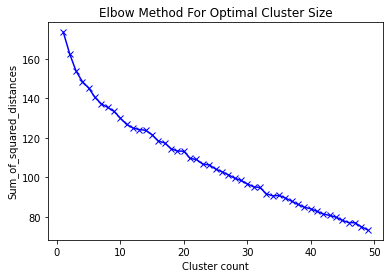

In [0]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_matrix)
    sosd.append(km.inertia_)
    print(str(k) + "processed")
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

In [0]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=6).fit(data_matrix)

#get Cluster labels.
clusters=kmeans.labels_

In [0]:

#Print cluster label and Courses under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    counter = 0
    for i in range(len(data)):
        if ( clusters[i] == group):
            print(clean_text(data[i]))
            counter = counter + 1
        if counter > 5:
            break


Group :  0 
-------------------
['bHere', 'newest', 'videos', 'subscriptions', 'To', 'change', 'subscriptions', 'receive', 'updates', 'turn', 'updates', 'go', 'email', 'options', 'httpwwwyoutubecomaccountnotificationsfeatureemsubsdigest', 'Latest', 'subscription', 'updates', 'httpyoutubeGYultAGPbosem', 'KALI', 'FACEBOOK', 'LIVE', 'THE', 'ACNE', 'CHANNEL', 'Here', 'newest', 'videos', 'subscriptions', 'To', 'change', 'subscriptions', 'receive', 'updates', 'turn', 'updates', 'go', 'email', 'optionshttpwwwyoutubecomaccountnotificationsfeatureemsubsdigestLatest', 'subscription', 'updateshttpyoutubeGYultAGPbosemKALI', 'FACEBOOK', 'LIVEby', 'THE', 'ACNE', 'CHANNELHere', 'newest', 'videos', 'subscriptions', 'To', 'change', 'subscriptions', 'receive', 'updates', 'turn', 'updates', 'go', 'email', 'optionshttpwwwyoutubecomaccountnotificationsfeatureemsubsdigestLatest', 'subscription', 'updateshttpyoutubeGYultAGPbosemKALI', 'FACEBOOK', 'LIVEby', 'THE', 'ACNE', 'CHANNELHere', 'newest', 'videos', '

In [0]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Generate wordcloud data
wordcloud = WordCloud(stopwords=stopwords, max_words=100, \
                      background_color="white").generate(filedata)


Group :  0 
-------------------


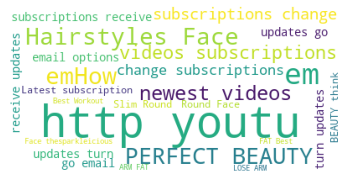


Group :  1 
-------------------


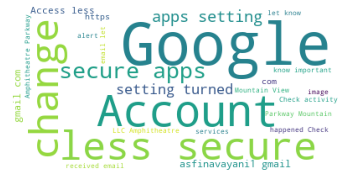


Group :  2 
-------------------


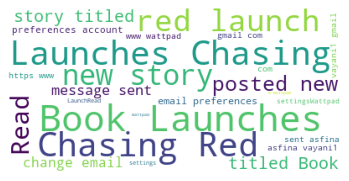


Group :  3 
-------------------


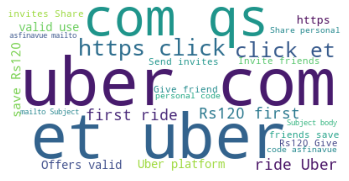


Group :  4 
-------------------


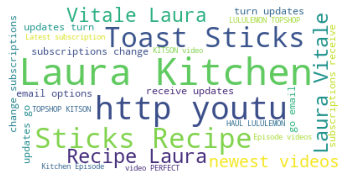


Group :  5 
-------------------


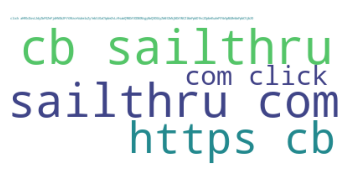

In [0]:
#Print cluster label and Courses under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    words = ''
    for i in range(len(data)):
        if ( clusters[i] == group):
            words = data[i] + " "

    #Generate wordcloud data
    wordcloud = WordCloud(stopwords=stopword, max_words=25, \
                      background_color="white").generate(words)
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [0]:
custom_data = ["Asfina, You've Done It!! ($53.00)"]

custom_matrix=vectorizer.transform(custom_data)

In [0]:
custom_matrix.shape

(1, 5554)

In [0]:
a = kmeans.predict(custom_matrix)

In [0]:
a

array([5], dtype=int32)

In [0]:
kmeans.cluster_centers_

array([0.        , 0.        , 0.        , ..., 0.00100567, 0.00301701,
       0.00100567])